In [37]:
import pathlib
import pickle
import numpy as np
# from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

def get_acc(data):
    total = data['tp'] + data['tn'] + data['fp'] + data['fn']
    acc = (data['tp'] + data['tn']) / total
    return acc

def get_fpr(data):
    fpr = data['fp'] / (data['fp'] + data['tn'])
    return fpr

def get_fnr(data):
    fnr = data['fn'] / (data['fn'] + data['tp'])
    return fnr

def get_tpr(data):
    tpr = data['tp'] / (data['tp'] + data['fn'])
    return tpr

In [38]:
results = {}
try:
    name = 'stegastamp_testing_results.bin'
    other_results = pickle.load(open(name,'rb'))
    for result in other_results:
        results[result] = other_results[result]
except:
    print('Stegastamp results not loaded.')

try:
    name = 'steganogan_testing_results.bin'
    other_results = pickle.load(open(name,'rb'))
    for result in other_results:
        results[result] = other_results[result]
except:
    print('Stegastamp results not loaded.')

try:
    name = 'facestamp_testing_results.bin'
    other_results = pickle.load(open(name,'rb'))
    for result in other_results:
        results[result] = other_results[result]
except:
    print('Facestamp results not loaded.')

try:
    name = 'facestamp_testing_results_other.bin'
    other_results = pickle.load(open(name,'rb'))
    for result in other_results:
        results[result] = other_results[result]
except:
    print('Facestamp other results not loaded.')

# name = 'other_testing_results.bin'
# other_results = pickle.load(open(name,'rb'))
# for result in other_results:
#     results[result] = other_results[result]

new_results = {}
new_results['main'] = results['main']
new_results['no_channel_coding'] = results['no_channel_coding']
new_results['no_mask_residual'] = results['no_mask_residual']
new_results['rw_distortion'] = results['rw_distortion']
new_results['steganogan_residual'] = results['steganogan_residual']
new_results['steganogan_basic'] = results['steganogan_basic']
new_results['steganogan_dense'] = results['steganogan_dense']
new_results['stegastamp'] = results['stegastamp']
results = new_results

print('Loaded results:')
for step, result in enumerate(results):
    print(step + 1, result)

Loaded results:
1 main
2 no_channel_coding
3 no_mask_residual
4 rw_distortion
5 steganogan_residual
6 steganogan_basic
7 steganogan_dense
8 stegastamp


In [39]:
models = ['facestamp', 'stegastamp', 'steganogan']

# for result in results:
#     print(result)
#     for cat in results[result]:
#         print(cat)
for model in models:
    try:
        name = f'{model}_testing_results_robust.bin'
        other_results = pickle.load(open(name,'rb'))
        for result in other_results:
            print(result)
            categories = [
            'preswap_compressed_80_match',
            'swap_compressed_80_match',
            'preswap_blur_match',
            'swap_blur_match',
            'preswap_color_match',
            'swap_color_match',
            ]
            for cat in categories:
                try:
                    results[result][cat] = other_results[result][cat]
                except Exception as e:
                    print(e)
                    continue
    except Exception as e:
        print(e)
        print('Robust other results not loaded.')

for result in results:
    print(result)
    for cat in results[result]:
        print(cat)

main
no_distortion_training
'no_distortion_training'
'no_distortion_training'
'no_distortion_training'
'no_distortion_training'
'no_distortion_training'
'no_distortion_training'
no_mask_residual
no_channel_coding
rw_distortion
stegastamp
steganogan_dense
steganogan_residual
steganogan_basic
main
preswap_match
faceswap_swap_match
simswap_swap_match
fsgan_swap_match
preswap_compressed_10_match
swap_compressed_10_match
preswap_compressed_20_match
swap_compressed_20_match
preswap_compressed_30_match
swap_compressed_30_match
preswap_compressed_40_match
swap_compressed_40_match
preswap_compressed_50_match
swap_compressed_50_match
preswap_compressed_60_match
swap_compressed_60_match
preswap_compressed_70_match
swap_compressed_70_match
preswap_compressed_80_match
swap_compressed_80_match
preswap_compressed_90_match
swap_compressed_90_match
preswap_blur_match
swap_blur_match
preswap_color_match
swap_color_match
no_channel_coding
preswap_match
faceswap_swap_match
simswap_swap_match
fsgan_swap_ma

In [40]:
for result in results:
    if(result == 'main'):
        results[result]['linestyle'] = 'solid'
    else:
        results[result]['linestyle'] = 'solid'

In [41]:
def get_cutoff(fpr, tpr, thresholds):
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'fpr':pd.Series(fpr,index=i), 'tpr':pd.Series(tpr,index=i), 'tf': pd.Series(tpr-(1-fpr),index=i), 'threshold': pd.Series(thresholds, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['fpr']), list(roc_t['tpr'])

In [42]:
# table_data = [['Model','Perspective Warp','Motion Blur','Gaussian Blur','Gaussian','Color Manipulation','JPEG Compression']]
# # table_data = [['Model','Perspective Warp','Motion Blur','Gaussian Blur']]

# for result in results:
#     rw_score = results[result]['rw_score']
#     table_data.append([result ,'%.4f' % rw_score['perspective_warp'], '%.4f' % rw_score['motion_blur'], '%.4f' % rw_score['gaussian_blur'], 
#     '%.4f' % rw_score['gaussian'], '%.4f' % rw_score['color_manipulation'], '%.4f' % rw_score['jpeg_compression']])

# # table_data.sort(key = lambda table_data: table_data[1], reverse=True)

# fig, ax = plt.subplots()


# table = ax.table(cellText=table_data, loc='center')
# table.set_fontsize(14)
# table.scale(3,4)
# ax.axis('off')

# # plt.figure(figsize=(16,8))
# # plt.ylabel('AUC')
# # plt.xlabel('Model')
# # plt.title(f'AUC Score Graph')
# # plt.bar(models, auc_data)
# # plt.legend()
# plt.savefig(f'results/results_test.png')
# plt.show()

In [51]:
# naming of results
names = {
    'main': 'Facestamp (Ours)',
    'no_mask_residual': 'No Residual Masking',
    'no_distortion_training': 'No Distortion Training',
    'no_channel_coding': 'No Channel Coding',
    'rw_distortion': 'Facestamp w/ JPEG Training (Ours)',
    'no_evaluation_tuning': 'Facestamp (No Evaluation Tuning)',
    'stegastamp': 'StegaStamp',
    'steganogan_residual': 'SteganoGAN (Residual)',
    'steganogan_dense': 'SteganoGAN (Dense)',
    'steganogan_basic': 'SteganoGAN (Basic)',
    'steganogan': 'SteganoGAN (Residual)'
}

for result in results:
    results[result]['name'] = names[result]

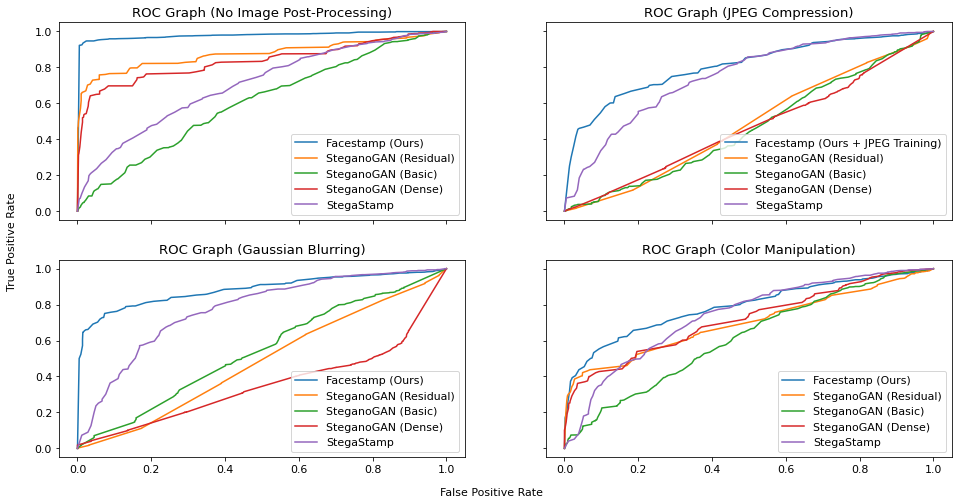

In [55]:
fig, axs = plt.subplots(ncols=2,nrows=2,sharex=True,sharey=True)

# axs[0,0].figure(figsize=(8,4))
fig.set_figheight(8)
fig.set_figwidth(16)
fig.text(0.5, 0.06, 'False Positive Rate', ha='center')
fig.text(0.08, 0.5, 'True Positive Rate', va='center', rotation='vertical')
# fig.rcParams.update({'font.size': 11})
# plt.rcParams.update({'font.size': 16})
dmodels = [
    'faceswap',
    'simswap',
    'fsgan',
]

selected = [
    'stegastamp',
    'steganogan_basic',
    'steganogan_residual',
    'steganogan_dense',
    'main',
]
for result in results:
    if(result not in selected):
        continue
    try:
        preswap = []
        swap = []
        for dmodel in dmodels:
            preswap = results[result]['preswap_match']
            swap += results[result][f'{dmodel}_swap_match']
        preswap_true = [1 for _ in range(len(preswap))]
        swap_true = [0 for _ in range(len(swap))]
        gt = preswap_true + swap_true
        prob = preswap + swap
        auc = metrics.roc_auc_score(gt, prob)
        fpr, tpr, thresholds = metrics.roc_curve(gt, prob)
        linestyle = results[result]['linestyle']
        linewidth = 1.5
        name = results[result]['name']
        axs[0,0].plot(fpr, tpr, label=f'{name}', linestyle=linestyle)
    except Exception as e:
        print(result, e)
        continue

    axs[0,0].set_title(f'ROC Graph (No Image Post-Processing)')
    axs[0,0].legend(loc='lower right')

selected = [
    'stegastamp',
    'steganogan_basic',
    'steganogan_residual',
    'steganogan_dense',
    'rw_distortion',
]
for result in results:
    if(result not in selected):
        continue
    try:
        preswap = results[result]['preswap_compressed_80_match']
        swap = results[result][f'swap_compressed_80_match']
        if(len(swap) == 0):
            continue
        preswap_true = [1 for _ in range(len(preswap))]
        swap_true = [0 for _ in range(len(swap))]
        gt = preswap_true + swap_true
        prob = preswap + swap
        auc = metrics.roc_auc_score(gt, prob)
        fpr, tpr, thresholds = metrics.roc_curve(gt, prob)
        linestyle = results[result]['linestyle']
        linewidth = 1.5
        name = results[result]['name']
        axs[0,1].plot(fpr, tpr, label=f'{name}', linestyle=linestyle)
    except Exception as e:
        print(result, e)
        continue

axs[0,1].set_title(f'ROC Graph (JPEG Compression)')
axs[0,1].legend(loc='lower right')

selected = [
    'stegastamp',
    'steganogan_basic',
    'steganogan_residual',
    'steganogan_dense',
    'main',
]

for result in results:
    if(result not in selected):
        continue
    try:
        preswap = results[result]['preswap_blur_match']
        swap = results[result][f'swap_blur_match']
        if(len(swap) == 0):
            continue
        preswap_true = [1 for _ in range(len(preswap))]
        swap_true = [0 for _ in range(len(swap))]
        gt = preswap_true + swap_true
        prob = preswap + swap
        auc = metrics.roc_auc_score(gt, prob)
        fpr, tpr, thresholds = metrics.roc_curve(gt, prob)
        linestyle = results[result]['linestyle']
        linewidth = 1.5
        name = results[result]['name']
        axs[1,0].plot(fpr, tpr, label=f'{name}', linestyle=linestyle)
    except Exception as e:
        print(result, e)
        continue

axs[1,0].set_title(f'ROC Graph (Gaussian Blurring)')
axs[1,0].legend(loc='lower right')

for result in results:
    if(result not in selected):
        continue
    try:
        preswap = results[result]['preswap_color_match']
        swap = results[result][f'swap_color_match']
        if(len(swap) == 0):
            continue
        preswap_true = [1 for _ in range(len(preswap))]
        swap_true = [0 for _ in range(len(swap))]
        gt = preswap_true + swap_true
        prob = preswap + swap
        auc = metrics.roc_auc_score(gt, prob)
        fpr, tpr, thresholds = metrics.roc_curve(gt, prob)
        linestyle = results[result]['linestyle']
        linewidth = 1.5
        name = results[result]['name']
        axs[1,1].plot(fpr, tpr, label=f'{name}', linestyle=linestyle)
    except Exception as e:
        print(result, e)
        continue

axs[1,1].set_title(f'ROC Graph (Color Manipulation)')
axs[1,1].legend(loc='lower right')



    # axs[0,0].set_ylabel('True Positive Rate', )
    # axs[0,0].set_xlabel('False Positive Rate')

    # axs[0,0].savefig(f'results/results_roc.png')

    # fig.show()

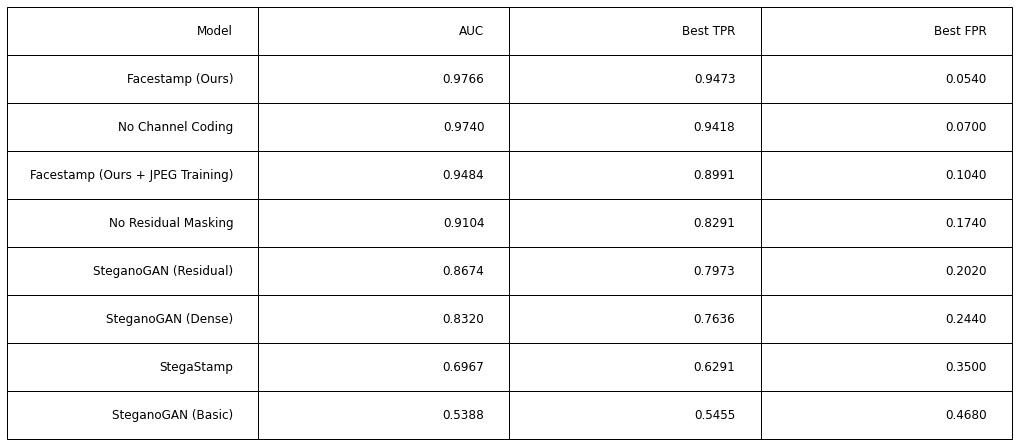

In [53]:
table_data = [['Model','AUC','Best TPR','Best FPR']]

scenarios = [
    ((0,0), 'faceswap'),
    ((0,1), 'simswap'),
    ((1,0), 'fsgan'),
    # ((1,1)),
]

for result in results:
    # preswap_blurred_compressed_match
    preswap = []
    swap = []
    for scenario in scenarios:
        preswap += results[result]['preswap_match']
        swap += results[result]['faceswap_swap_match']
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    preswap_std = np.std(preswap)
    swap_std = np.std(swap)
    name = results[result]['name']
    fpr, tpr, thresholds = metrics.roc_curve(gt, prob)
    (best_fpr, best_tpr) = get_cutoff(fpr, tpr, thresholds)
    best_fpr, best_tpr = best_fpr[0], best_tpr[0]
    table_data.append([name,'%.4f' % auc, '%.4f' % best_tpr, '%.4f' % best_fpr])


table_data.sort(key = lambda table_data: table_data[1], reverse=True)

fig, ax = plt.subplots()


table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(3,4)
ax.axis('off')
plt.show()

main
no_channel_coding
no_mask_residual
rw_distortion
steganogan_residual
steganogan_basic
steganogan_dense
stegastamp


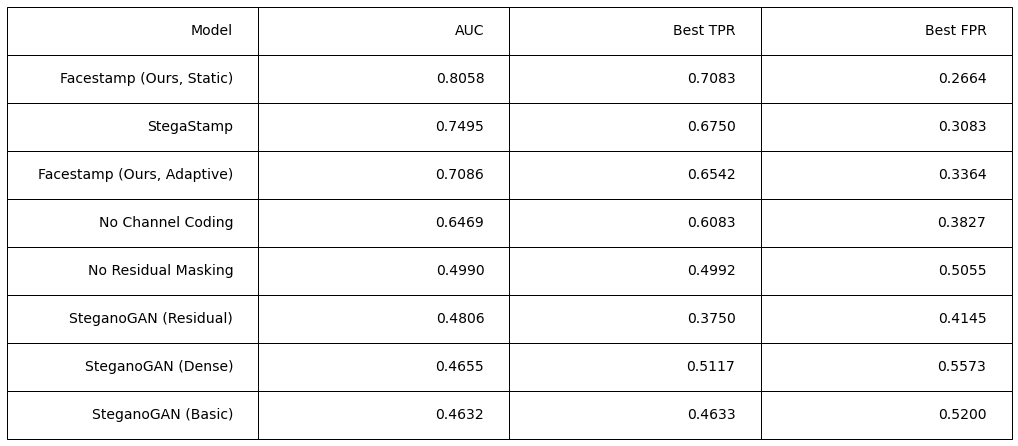

In [46]:
table_data = [['Model','AUC','Best TPR','Best FPR']]

scenarios = [
    ((0,0), 'faceswap'),
    ((0,1), 'simswap'),
    ((1,0), 'fsgan'),
    # ((1,1)),
]

for result in results:
    # preswap_blurred_compressed_match
    try:
        print(result)
        preswap = results[result]['preswap_compressed_80_match']
        swap = results[result]['swap_compressed_80_match']
        preswap_true = [1 for _ in range(len(preswap))]
        swap_true = [0 for _ in range(len(swap))]
        gt = preswap_true + swap_true
        prob = preswap + swap
        auc = metrics.roc_auc_score(gt, prob)
        preswap_std = np.std(preswap)
        swap_std = np.std(swap)
        name = results[result]['name']
        fpr, tpr, thresholds = metrics.roc_curve(gt, prob)
        (best_fpr, best_tpr) = get_cutoff(fpr, tpr, thresholds)
        best_fpr, best_tpr = best_fpr[0], best_tpr[0]
        table_data.append([name,'%.4f' % auc, '%.4f' % best_tpr, '%.4f' % best_fpr])
    except:
        continue


table_data.sort(key = lambda table_data: table_data[1], reverse=True)

fig, ax = plt.subplots()


table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(3,4)
ax.axis('off')
plt.show()

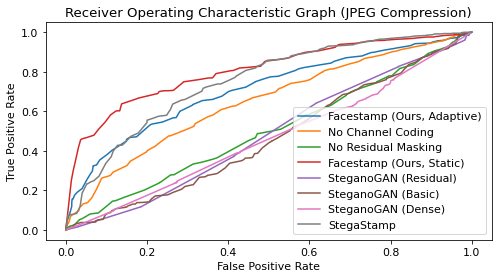

In [47]:
plt.figure(figsize=(8,4))
plt.rcParams.update({'font.size': 11})
qualities = range(10, 90, 20)

for result in results:
    try:
        preswap = []
        swap = []
        # categories = ['preswap_match', 'preswap_compressed_match', 'preswap_blurred_compressed_match']
        categories = [f'preswap_compressed_80_match' for quality in qualities]
        for cat in categories:
            preswap += results[result][cat]
        # categories = ['faceswap_swap_match', 'faceswap_swap_compressed_match', 'faceswap_swap_blurred_compressed_match']
        categories = [f'swap_compressed_80_match' for quality in qualities]
        for cat in categories:
            swap = results[result][cat]
    except:
        continue
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    fpr, tpr, _ = metrics.roc_curve(gt, prob)
    linestyle = results[result]['linestyle']
    linewidth = 1.5
    name = results[result]['name']
    plt.plot(fpr, tpr, label=f'{name}', linestyle=linestyle)

plt.ylabel('True Positive Rate', )
plt.xlabel('False Positive Rate')
plt.title(f'Receiver Operating Characteristic Graph (JPEG Compression)')
plt.legend()
plt.savefig(f'results/results_roc.png')

plt.show()

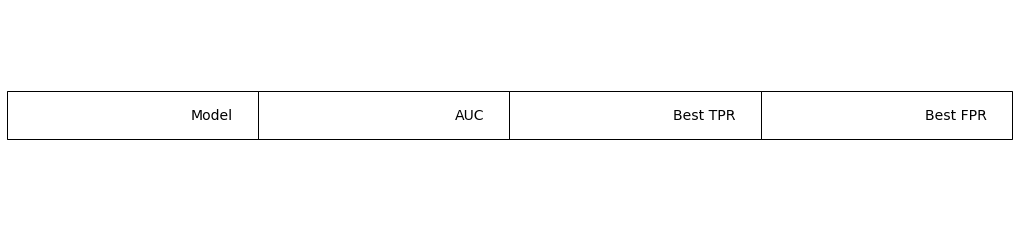

In [48]:
table_data = [['Model','AUC','Best TPR','Best FPR']]

for result in results:
    # preswap_blurred_compressed_match
    try:
        preswap = []
        swap = []
        # categories = ['preswap_match', 'preswap_compressed_match', 'preswap_blurred_compressed_match']
        categories = [f'preswap_compressed_{quality}_match' for quality in qualities]
        for cat in categories:
            preswap += results[result][cat]
        # categories = ['faceswap_swap_match', 'faceswap_swap_compressed_match', 'faceswap_swap_blurred_compressed_match']
        categories = [f'faceswap_swap_compressed_{quality}_match' for quality in qualities]
        for cat in categories:
            swap = results[result][cat]
    except:
        continue
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    preswap_std = np.std(preswap)
    swap_std = np.std(swap)
    name = results[result]['name']
    fpr, tpr, thresholds = metrics.roc_curve(gt, prob)
    (best_fpr, best_tpr) = get_cutoff(fpr, tpr, thresholds)
    best_fpr, best_tpr = best_fpr[0], best_tpr[0]
    table_data.append([name,'%.4f' % auc, '%.4f' % best_tpr, '%.4f' % best_fpr])


table_data.sort(key = lambda table_data: table_data[1], reverse=True)

fig, ax = plt.subplots()


table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(3,4)
ax.axis('off')
plt.show()